<a href="https://colab.research.google.com/github/DorMm1/Ono-Image-Processing/blob/master/05_01_L07_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

StudentName = 'Dor Menahem'
StudentID = '318687746'
StudentMobile = '052-8028427'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


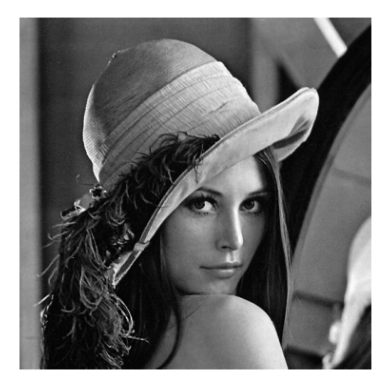

In [8]:
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path to your image
image_path = '/content/drive/My Drive/MyOnoFiles/lena.png'

# Load and display the image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

Help me extract the image's edges by kernel and the convolution


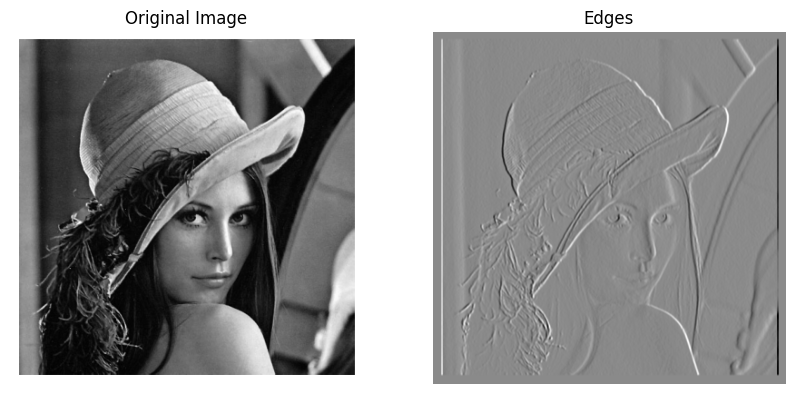

In [5]:
import numpy as np
from scipy.signal import convolve2d


# Load the image
image = Image.open(image_path)
img_array = np.array(image)

# Define a simple edge detection kernel (e.g., Sobel kernel)
sobel_kernel = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

# Apply convolution to the image using the Sobel kernel
edges = convolve2d(img_array[:, :, 0], sobel_kernel, mode='same', boundary='symm')

# Display the original image and the extracted edges
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

plt.show()


Explain this code like I'm a 5 year old



Sure, let's break it down!

Mounting Google Drive:

python
Copy code
from google.colab import drive
drive.mount('/content/drive')
This is like telling the computer, "Hey, I want to use files from my Google Drive." It helps you connect your Google Drive to the code.

Loading and Displaying an Image:

python
Copy code
from PIL import Image
import matplotlib.pyplot as plt

image_path = '/content/drive/My Drive/Image_Processing_312546534/lena.png'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()
Here, you're saying, "Open the picture at this specific location on my Google Drive and show it to me." The computer then displays the image.

Edge Detection using Convolution:

python
Copy code
import numpy as np
from scipy.signal import convolve2d

img_array = np.array(image)

sobel_kernel = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

edges = convolve2d(img_array[:, :, 0], sobel_kernel, mode='same', boundary='symm')
Now, you're saying, "Let's find the edges of the picture using a special technique called convolution." The sobel_kernel is like a special tool to find edges. The computer then goes through the picture and finds where the edges are.

Displaying Original Image and Extracted Edges:

python
Copy code
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.axis('off')

plt.show()
Finally, you're saying, "Show me the original picture and also show me the edges you found." The computer then displays both pictures side by side.

So, in simple terms, you're telling the computer to look at a picture, find the edges in it, and then show you both the original picture and the edges it found.

write a function that decrease the sharpness of the image with kernel, display 3 images with 3 different level of sharpness. 1st image low sharpness 2nd image medium sharpness 3rd image high sharpness

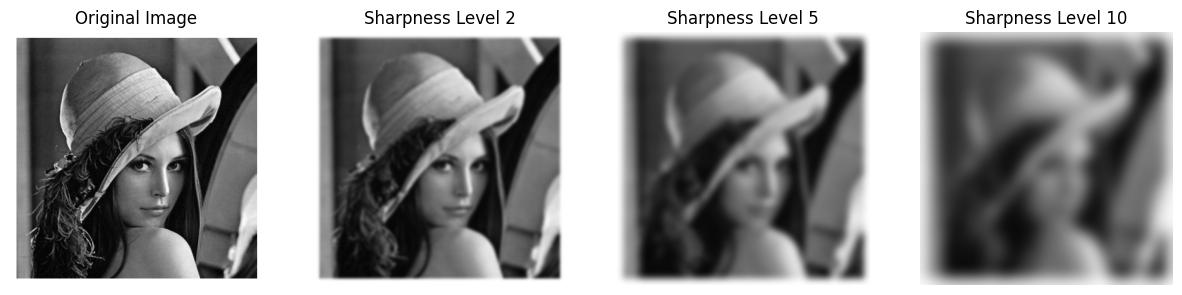

In [10]:
from PIL import ImageFilter

def decrease_sharpness(image, level):
    # Apply blur filter to decrease sharpness
    blurred_image = image.filter(ImageFilter.GaussianBlur(radius=level))

    return blurred_image

# Load the original image
original_image = Image.open(image_path)

# Display the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Decrease sharpness with different levels
sharpness_levels = [2, 5, 10]

for i, level in enumerate(sharpness_levels):
    # Apply the decrease_sharpness function
    blurred_image = decrease_sharpness(original_image, level)

    # Display the image with decreased sharpness
    plt.subplot(1, 4, i + 2)
    plt.imshow(blurred_image)
    plt.title(f'Sharpness Level {level}')
    plt.axis('off')

plt.show()


write a function to display the difference in absolute value between the original image and each of the blurred images - gray level between 0-255

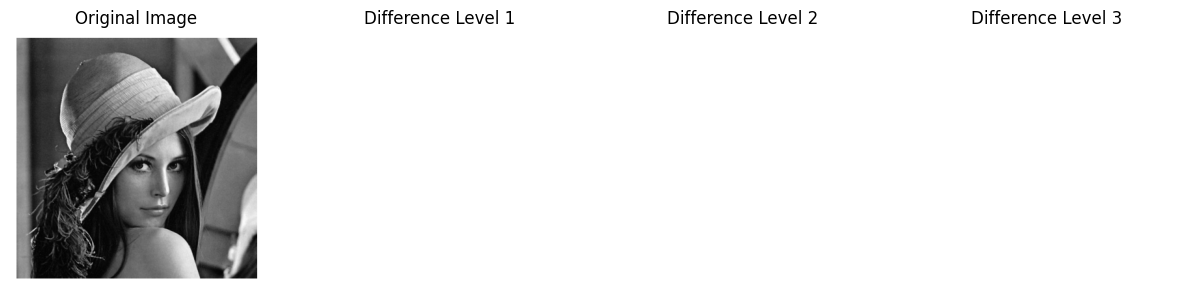

In [12]:
def display_difference_images(original_image, blurred_images):
    # Display the original image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(blurred_images) + 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    # Calculate and display the absolute differences
    for i, blurred_image in enumerate(blurred_images):
        # Calculate the absolute difference
        diff_image = np.abs(np.array(original_image) - np.array(blurred_image))

        # Display the difference image
        plt.subplot(1, len(blurred_images) + 1, i + 2)
        plt.imshow(diff_image, cmap='gray', vmin=0, vmax=255)
        plt.title(f'Difference Level {i + 1}')
        plt.axis('off')

    plt.show()

# Specify sharpness levels
sharpness_levels = [2, 5, 10]

# Generate blurred images
blurred_images = [decrease_sharpness(original_image, level) for level in sharpness_levels]

# Display the difference images
display_difference_images(original_image, blurred_images)


it doesnt work, show results in gray scale 0-255



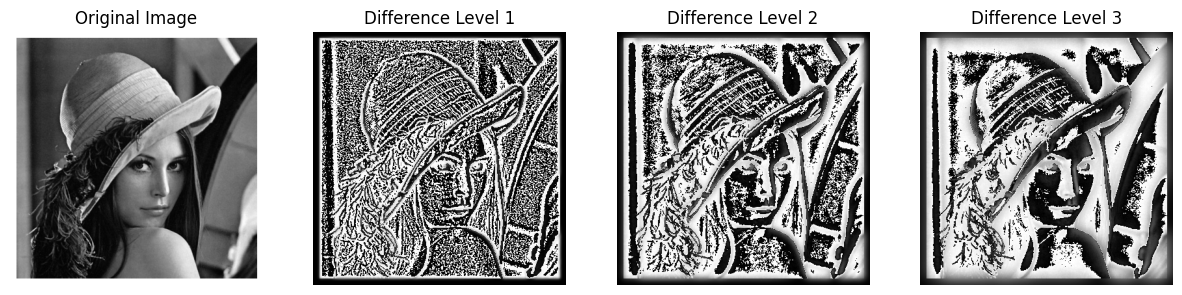

In [14]:
def display_difference_images(original_image, blurred_images):
    # Display the original image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(blurred_images) + 1, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Calculate and display the absolute differences
    for i, blurred_image in enumerate(blurred_images):
        # Calculate the absolute difference
        diff_image = np.abs(np.array(original_image.convert("L")) - np.array(blurred_image.convert("L")))

        # Display the difference image
        plt.subplot(1, len(blurred_images) + 1, i + 2)
        plt.imshow(diff_image, cmap='gray', vmin=0, vmax=255)
        plt.title(f'Difference Level {i + 1}')
        plt.axis('off')

    plt.show()

# Specify sharpness levels
sharpness_levels = [2, 5, 10]

# Generate blurred images
blurred_images = [decrease_sharpness(original_image, level) for level in sharpness_levels]

# Display the difference images
display_difference_images(original_image, blurred_images)


Now shows the histogram of the differences images once with grayscale and second without

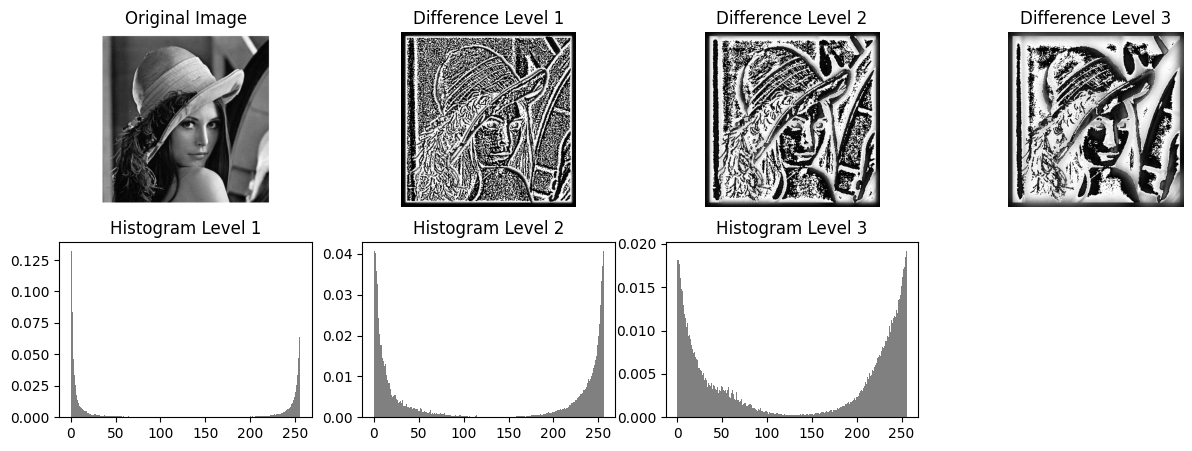

In [15]:
def display_difference_images_with_histogram(original_image, blurred_images):
    # Display the original image
    plt.figure(figsize=(15, 5))
    plt.subplot(2, len(blurred_images) + 1, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    for i, blurred_image in enumerate(blurred_images):
        # Calculate the absolute difference
        diff_image = np.abs(np.array(original_image.convert("L")) - np.array(blurred_image.convert("L")))

        # Display the difference image
        plt.subplot(2, len(blurred_images) + 1, i + 2)
        plt.imshow(diff_image, cmap='gray', vmin=0, vmax=255)
        plt.title(f'Difference Level {i + 1}')
        plt.axis('off')

        # Display the histogram of the difference image
        plt.subplot(2, len(blurred_images) + 1, i + len(blurred_images) + 2)
        plt.hist(diff_image.flatten(), bins=256, range=(0, 256), density=True, color='gray')
        plt.title(f'Histogram Level {i + 1}')

    plt.show()

# Specify sharpness levels
sharpness_levels = [2, 5, 10]

# Generate blurred images
blurred_images = [decrease_sharpness(original_image, level) for level in sharpness_levels]

# Display the difference images and their histograms
display_difference_images_with_histogram(original_image, blurred_images)


show the historam on the original image

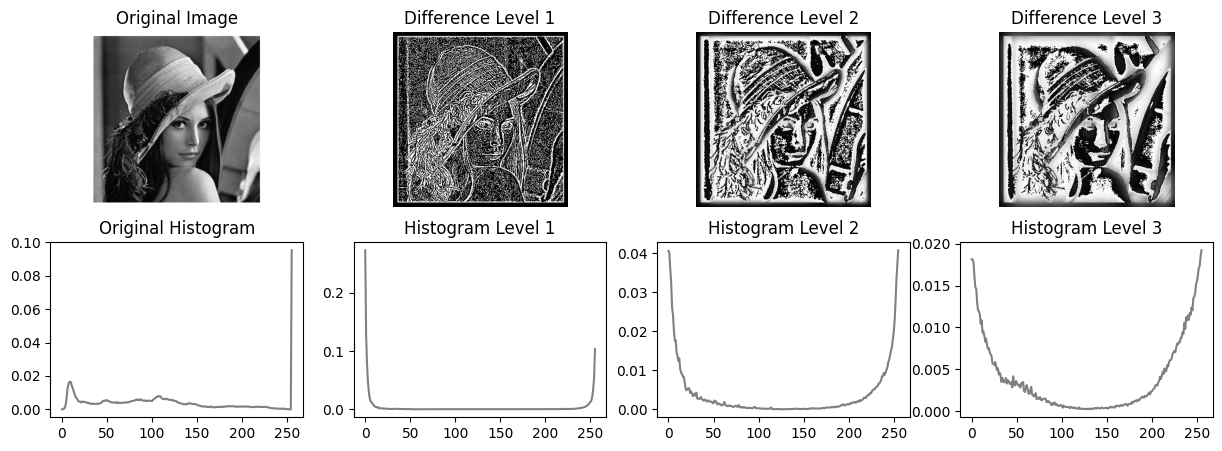

In [17]:
def display_difference_images_with_histogram(original_image, blurred_images):
    # Display the original image
    plt.figure(figsize=(15, 5))

    # Plot original image
    plt.subplot(2, len(blurred_images) + 1, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot histogram of the original image
    plt.subplot(2, len(blurred_images) + 1, len(blurred_images) + 2)
    original_hist = np.histogram(np.array(original_image.convert("L")).flatten(), bins=256, range=(0, 256), density=True)
    plt.plot(original_hist[1][:-1], original_hist[0], color='gray')
    plt.title('Original Histogram')

    for i, blurred_image in enumerate(blurred_images):
        # Calculate the absolute difference
        diff_image = np.abs(np.array(original_image.convert("L")) - np.array(blurred_image.convert("L")))

        # Display the difference image
        plt.subplot(2, len(blurred_images) + 1, i + 2)
        plt.imshow(diff_image, cmap='gray', vmin=0, vmax=255)
        plt.title(f'Difference Level {i + 1}')
        plt.axis('off')

        # Display the histogram of the difference image
        plt.subplot(2, len(blurred_images) + 1, i + len(blurred_images) + 3)
        diff_hist = np.histogram(diff_image.flatten(), bins=256, range=(0, 256), density=True)
        plt.plot(diff_hist[1][:-1], diff_hist[0], color='gray')
        plt.title(f'Histogram Level {i + 1}')

    plt.show()

# Specify sharpness levels
sharpness_levels = [1, 5, 10]

# Generate blurred images
blurred_images = [decrease_sharpness(original_image, level) for level in sharpness_levels]

# Display the difference images and their histograms
display_difference_images_with_histogram(original_image, blurred_images)


Now show only original image histogram without blurred ones but use only 10 bins


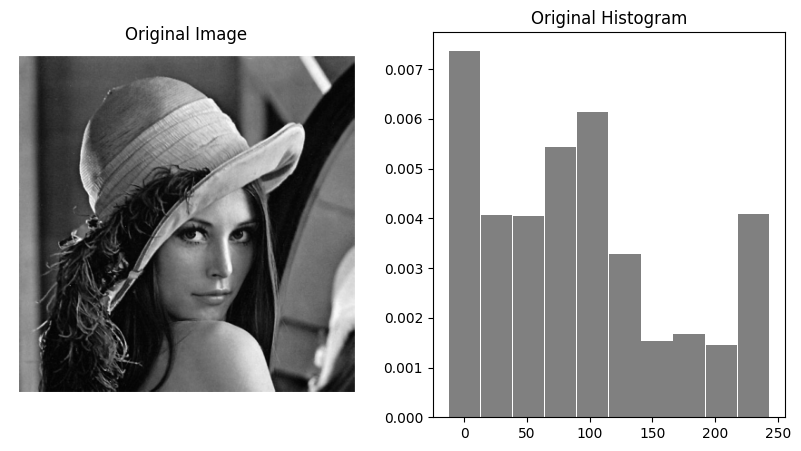

In [18]:
def display_original_image_histogram(original_image):
    # Calculate the histogram of the original image
    original_hist = np.histogram(np.array(original_image.convert("L")).flatten(), bins=10, range=(0, 256), density=True)

    # Display the original image and its histogram
    plt.figure(figsize=(10, 5))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot histogram of the original image
    plt.subplot(1, 2, 2)
    plt.bar(original_hist[1][:-1], original_hist[0], width=25, color='gray')
    plt.title('Original Histogram')

    plt.show()

# Display only the histogram of the original image with 10 bins
display_original_image_histogram(original_image)


Now I want the equalization of the image



In [19]:
from PIL import ImageOps

# Perform histogram equalization on the original image
equalized_image = ImageOps.equalize(original_image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()


OSError: not supported for this image mode

pasted the error in chat

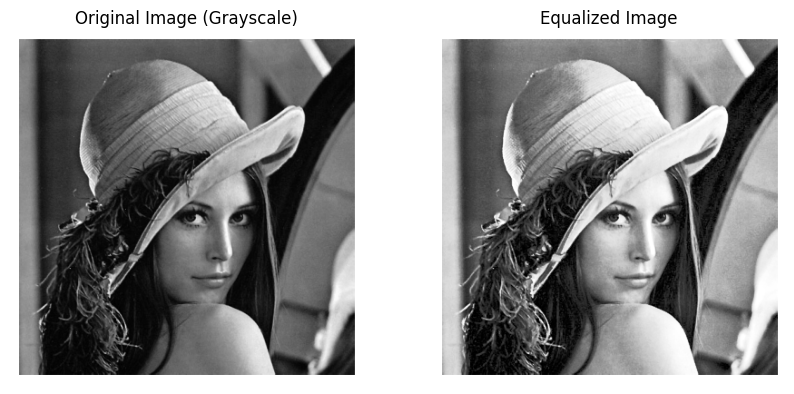

In [20]:
from PIL import ImageOps

# Convert the original image to grayscale
gray_original_image = original_image.convert('L')

# Perform histogram equalization on the grayscale image
equalized_image = ImageOps.equalize(gray_original_image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_original_image, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')

# Equalized image
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()


Add the histogram to the new image



<Axes: >

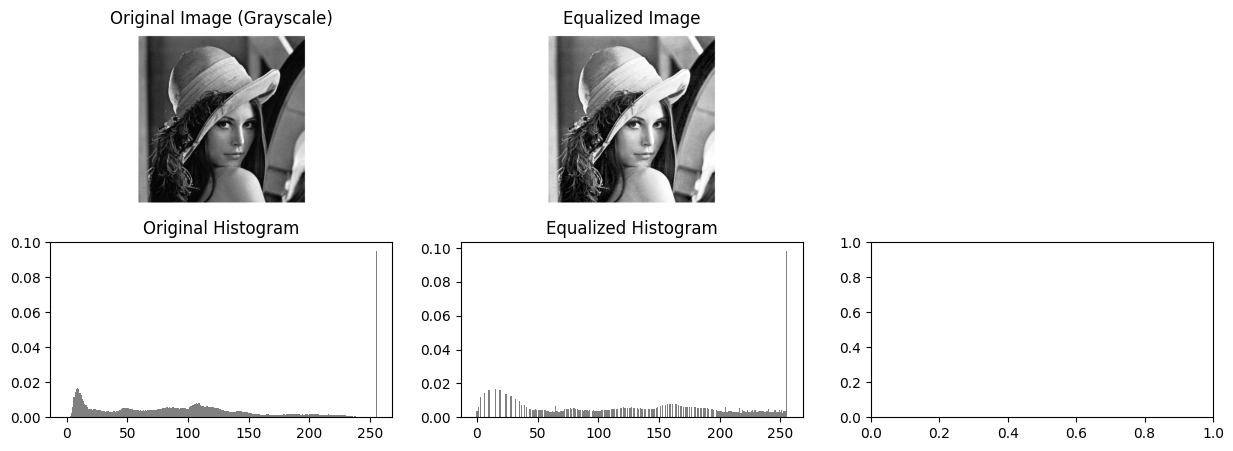

In [21]:
from PIL import ImageOps

# Convert the original image to grayscale
gray_original_image = original_image.convert('L')

# Perform histogram equalization on the grayscale image
equalized_image = ImageOps.equalize(gray_original_image)

# Calculate histograms
original_hist = np.histogram(np.array(gray_original_image).flatten(), bins=256, range=(0, 256), density=True)
equalized_hist = np.histogram(np.array(equalized_image).flatten(), bins=256, range=(0, 256), density=True)

# Display the original, equalized images, and their histograms
plt.figure(figsize=(15, 5))

# Original image and histogram
plt.subplot(2, 3, 1)
plt.imshow(gray_original_image, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.bar(original_hist[1][:-1], original_hist[0], width=1, color='gray')
plt.title('Original Histogram')

# Equalized image and histogram
plt.subplot(2, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.bar(equalized_hist[1][:-1], equalized_hist[0], width=1, color='gray')
plt.title('Equalized Histogram')

# Empty space
plt.subplot(2, 3, 3)
plt.axis('off')

plt.subplot(2, 3, 6)


help me code a function which displays the image with a slider that will manage the brightness of the image and will also display the histogram of the image

In [23]:
from ipywidgets import interact, widgets
from PIL import ImageEnhance

def display_image_with_brightness(image_path):
    # Load the image
    original_image = Image.open(image_path)

    # Function to update the displayed image and histogram
    def update_brightness(brightness):
        # Adjust brightness using ImageEnhance
        enhanced_image = ImageEnhance.Brightness(original_image).enhance(brightness)

        # Calculate histogram of the enhanced image
        enhanced_hist = np.histogram(np.array(enhanced_image).flatten(), bins=256, range=(0, 256), density=True)

        # Display the image and histogram
        plt.figure(figsize=(15, 5))

        # Display the enhanced image
        plt.subplot(1, 2, 1)
        plt.imshow(enhanced_image, cmap='gray')
        plt.title(f'Enhanced Image (Brightness={brightness:.2f})')
        plt.axis('off')

        # Display the histogram of the enhanced image
        plt.subplot(1, 2, 2)
        plt.bar(enhanced_hist[1][:-1], enhanced_hist[0], width=1, color='gray')
        plt.title('Enhanced Image Histogram')

        plt.show()

    # Set up the interactive slider
    brightness_slider = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Brightness')
    interact(update_brightness, brightness=brightness_slider)

# Specify the path to your image
image_path = '/content/drive/My Drive/MyOnoFiles/lena.png'

# Display the image with brightness slider and histogram
display_image_with_brightness(image_path)


interactive(children=(FloatSlider(value=1.0, description='Brightness', max=2.0, min=0.1), Output()), _dom_clas…

Now write a code which performs a fourier transform to the frequency plane, displays the size component of the image in the frequency plane

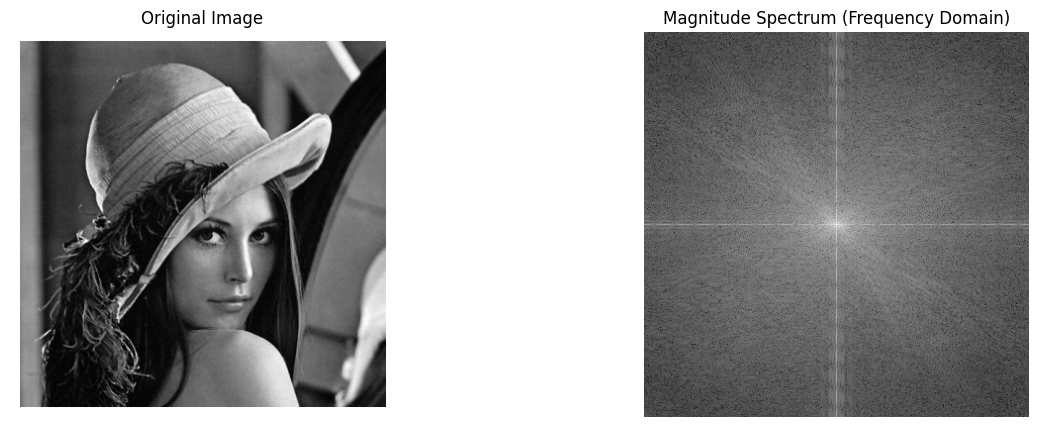

In [24]:
import numpy as np
from PIL import Image

# Load the image
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Perform Fourier transform
fft_result = np.fft.fft2(np.array(original_image))

# Shift the zero frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)

# Calculate magnitude spectrum
magnitude_spectrum = np.abs(fft_shifted)

# Display the original image and its magnitude spectrum
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the magnitude spectrum in the frequency domain
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')  # Use log for better visualization
plt.title('Magnitude Spectrum (Frequency Domain)')
plt.axis('off')

plt.show()


On the same code now add a step to run a hypesfilter on the image in the frequency plane, and finally to convert the image from the frequency plane back to the spatial plane. display the image after each action

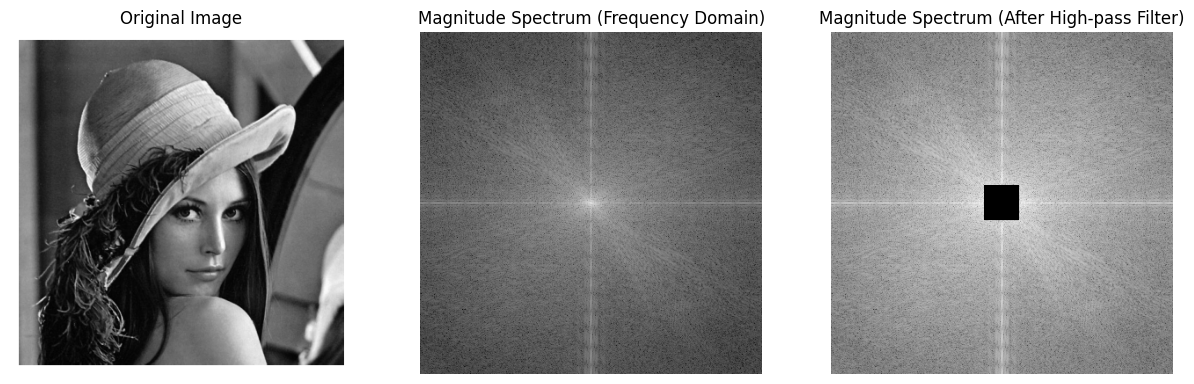

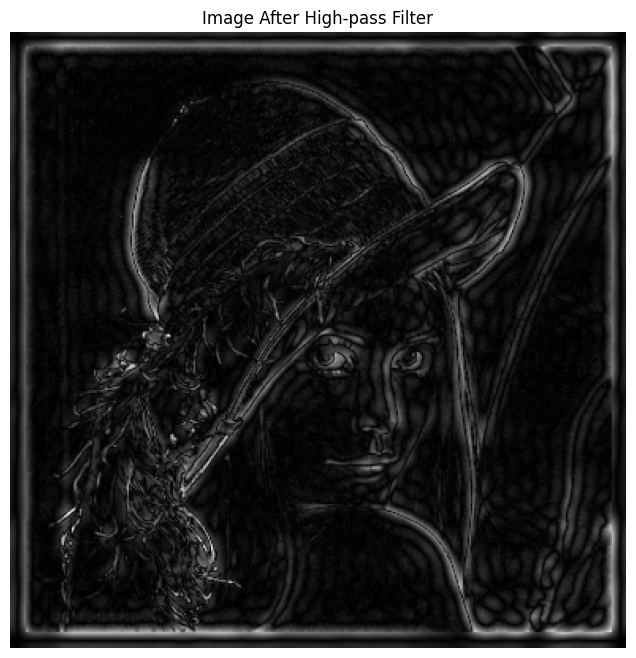

In [25]:
import numpy as np
from PIL import Image

def high_pass_filter(image_fft, cutoff_frequency):
    rows, cols = image_fft.shape
    center_row, center_col = rows // 2, cols // 2

    # Create a high-pass filter mask
    mask = np.ones((rows, cols))
    mask[center_row - cutoff_frequency:center_row + cutoff_frequency,
         center_col - cutoff_frequency:center_col + cutoff_frequency] = 0

    # Apply the high-pass filter by element-wise multiplication
    image_fft_filtered = image_fft * mask

    return image_fft_filtered

# Load the image
original_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Perform Fourier transform
fft_result = np.fft.fft2(np.array(original_image))

# Shift the zero frequency component to the center
fft_shifted = np.fft.fftshift(fft_result)

# Calculate magnitude spectrum
magnitude_spectrum = np.abs(fft_shifted)

# Display the original image and its magnitude spectrum
plt.figure(figsize=(15, 5))

# Display the original image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the magnitude spectrum in the frequency domain
plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')  # Use log for better visualization
plt.title('Magnitude Spectrum (Frequency Domain)')
plt.axis('off')

# Apply high-pass filter in the frequency domain
cutoff_frequency = 20
fft_result_filtered = high_pass_filter(fft_shifted, cutoff_frequency)

# Calculate magnitude spectrum of the filtered image
magnitude_spectrum_filtered = np.abs(fft_result_filtered)

# Display the magnitude spectrum after applying high-pass filter
plt.subplot(1, 3, 3)
plt.imshow(np.log(1 + magnitude_spectrum_filtered), cmap='gray')
plt.title('Magnitude Spectrum (After High-pass Filter)')
plt.axis('off')

# Perform inverse Fourier transform
image_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_result_filtered)))

# Display the image after applying high-pass filter
plt.figure(figsize=(8, 8))
plt.imshow(image_filtered, cmap='gray')
plt.title('Image After High-pass Filter')
plt.axis('off')

plt.show()
